In [1]:
import pandas as pd
import numpy as np
import copy
import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
relative_path = "../__Fitting_Drivers/"
absolute_path = os.path.abspath(relative_path)

import sys

sys.path.append(absolute_path)

In [2]:
samples = pd.read_excel('./Sampling data/heat_exchanger_process_data_v4.xlsx', index_col=0)

In [3]:
samples

,FEED1MASSFLOW,FEED1TEMP,PROD1MASSFLOW,PROD1TEMP,E1FOULING,E2FOULING,timestamp
0,18035.534301,25.256563,45159.717210,116.560578,0.000397,0.000437,2023-04-25 13:05:32.264
1,17885.823383,25.102091,45784.423560,112.404756,0.000386,0.000396,2023-04-26 13:05:32.264
2,18346.787165,24.394746,43968.764416,114.985013,0.000385,0.000366,2023-04-27 13:05:32.264
3,18031.977897,25.377073,44989.791884,114.701189,0.000427,0.000388,2023-04-28 13:05:32.264
4,18402.514701,25.300514,44746.733476,113.177082,0.000368,0.000418,2023-04-29 13:05:32.264
...,...,...,...,...,...,...,...
725,12954.758583,20.376865,33873.838507,127.677987,0.000455,0.000423,2025-04-19 13:05:32.264
726,12771.858927,20.678336,34390.019289,126.509543,0.000482,0.000441,2025-04-20 13:05:32.264
727,13325.129549,20.283093,33554.652309,127.354642,0.000473,0.000438,2025-04-21 13:05:32.264
728,13512.724115,20.311956,34288.721846,127.559268,0.000498,0.000464,2025-04-22 13:05:32.264


# Run simulation with test data

In [4]:
closeapp = True  # Close Hysys at the end

hy_filename = '../00_Modell_database/Simulation/SampleModel_V2.hsc'
hy_visible = True

In [5]:
import Simulation_driver as SM

In [6]:
# Simulation Cols mapping
cols_mapping = {'InputParams': {'FEED1MASSFLOW': 'C3', 'FEED1TEMP': 'C4','PROD1MASSFLOW': 'C5','PROD1TEMP': 'C6',
                          'E1FOULING': 'C11', 'E2FOULING': 'C15'},
               'OutputParams': {'PROD1E1IN': 'C3', 'PROD1OUT': 'C4', 'FEED1E1OUT': 'C7', 'FEED1OUT': 'C8'},
               'Outputuoms': {'PROD1E1IN': 'C', 'PROD1OUT': 'C', 'FEED1E1OUT': 'C', 'FEED1OUT': 'C'}
               }
# X , y cols sorrend a fontos az ANN-hez majd
x_cols = list(cols_mapping['InputParams'].keys())
y_cols = list(cols_mapping['OutputParams'].keys())

In [7]:
# init driver
simd = SM.simulation_driver(hy_filename, cols_mapping, x_cols, y_cols)
simd.load_model()

 # Connecting to the Aspen Hysys App ... 
 
HySys File: ----------   SampleModel_V2.hsc
HySys Fluid Package: ---   NRTL - Ideal
 
Model loaded sucessfuly!


In [8]:
samplingresult = []

for keys, items in tqdm.tqdm(samples.iterrows()):
    #print(keys)
    datainput = dict(items)
    tempresdict = copy.deepcopy(datainput)
    
    # run sim
    simres = simd.predict(datainput)
    # form result
    for k, r in zip(cols_mapping['OutputParams'].keys(), simres):
        tempresdict[k] = r
    # add to list
    samplingresult.append(tempresdict)

730it [00:38, 19.20it/s]


In [9]:
testdf = pd.DataFrame(samplingresult)

In [10]:
testdf

,FEED1MASSFLOW,FEED1TEMP,PROD1MASSFLOW,PROD1TEMP,E1FOULING,E2FOULING,timestamp,PROD1E1IN,PROD1OUT,FEED1E1OUT,FEED1OUT
0,18035.534301,25.256563,45159.717210,116.560578,0.000397,0.000437,2023-04-25 13:05:32.264,108.272257,97.485723,52.191876,72.969768
1,17885.823383,25.102091,45784.423560,112.404756,0.000386,0.000396,2023-04-26 13:05:32.264,104.353505,94.107349,51.161204,71.760315
2,18346.787165,24.394746,43968.764416,114.985013,0.000385,0.000366,2023-04-27 13:05:32.264,105.935094,95.002899,50.387860,72.079395
3,18031.977897,25.377073,44989.791884,114.701189,0.000427,0.000388,2023-04-28 13:05:32.264,106.085446,95.829221,50.715138,72.215053
4,18402.514701,25.300514,44746.733476,113.177082,0.000368,0.000418,2023-04-29 13:05:32.264,105.007513,94.305508,51.246225,71.104143
...,...,...,...,...,...,...,...,...,...,...,...
725,12954.758583,20.376865,33873.838507,127.677987,0.000455,0.000423,2025-04-19 13:05:32.264,116.930216,103.507005,55.178461,83.479979
726,12771.858927,20.678336,34390.019289,126.509543,0.000482,0.000441,2025-04-20 13:05:32.264,116.211295,103.426240,55.002868,82.912778
727,13325.129549,20.283093,33554.652309,127.354642,0.000473,0.000438,2025-04-21 13:05:32.264,116.422904,103.117399,53.744962,81.451959
728,13512.724115,20.311956,34288.721846,127.559268,0.000498,0.000464,2025-04-22 13:05:32.264,116.845472,103.804398,53.181683,80.545405


In [11]:
testdf.to_excel('./Sim_result/Heat_exchanger_process_data_result_V4.xlsx')

In [12]:
test_data1 = pd.read_excel('./Sim_result//Heat_exchanger_process_data_result_V4.xlsx', index_col=0)
lhs_data = pd.read_csv('./Sim_result/Surrogate_dataset_LHS_200.csv', index_col=0)


# Simulation Cols mapping
cols_mapping = {'InputParams': {'FEED1MASSFLOW': 'C3', 'FEED1TEMP': 'C4','PROD1MASSFLOW': 'C5','PROD1TEMP': 'C6',
                          'E1FOULING': 'C11', 'E2FOULING': 'C15'},
               'OutputParams': {'PROD1E1IN': 'C3', 'PROD1OUT': 'C4', 'FEED1E1OUT': 'C7', 'FEED1OUT': 'C8'},
               'Outputuoms': {'PROD1E1IN': 'C', 'PROD1OUT': 'C', 'FEED1E1OUT': 'C', 'FEED1OUT': 'C'}
               }

# X , y cols sorrend a fontos az ANN-hez majd
x_cols = list(cols_mapping['InputParams'].keys())
y_cols = list(cols_mapping['OutputParams'].keys())

xy_cols = x_cols + y_cols


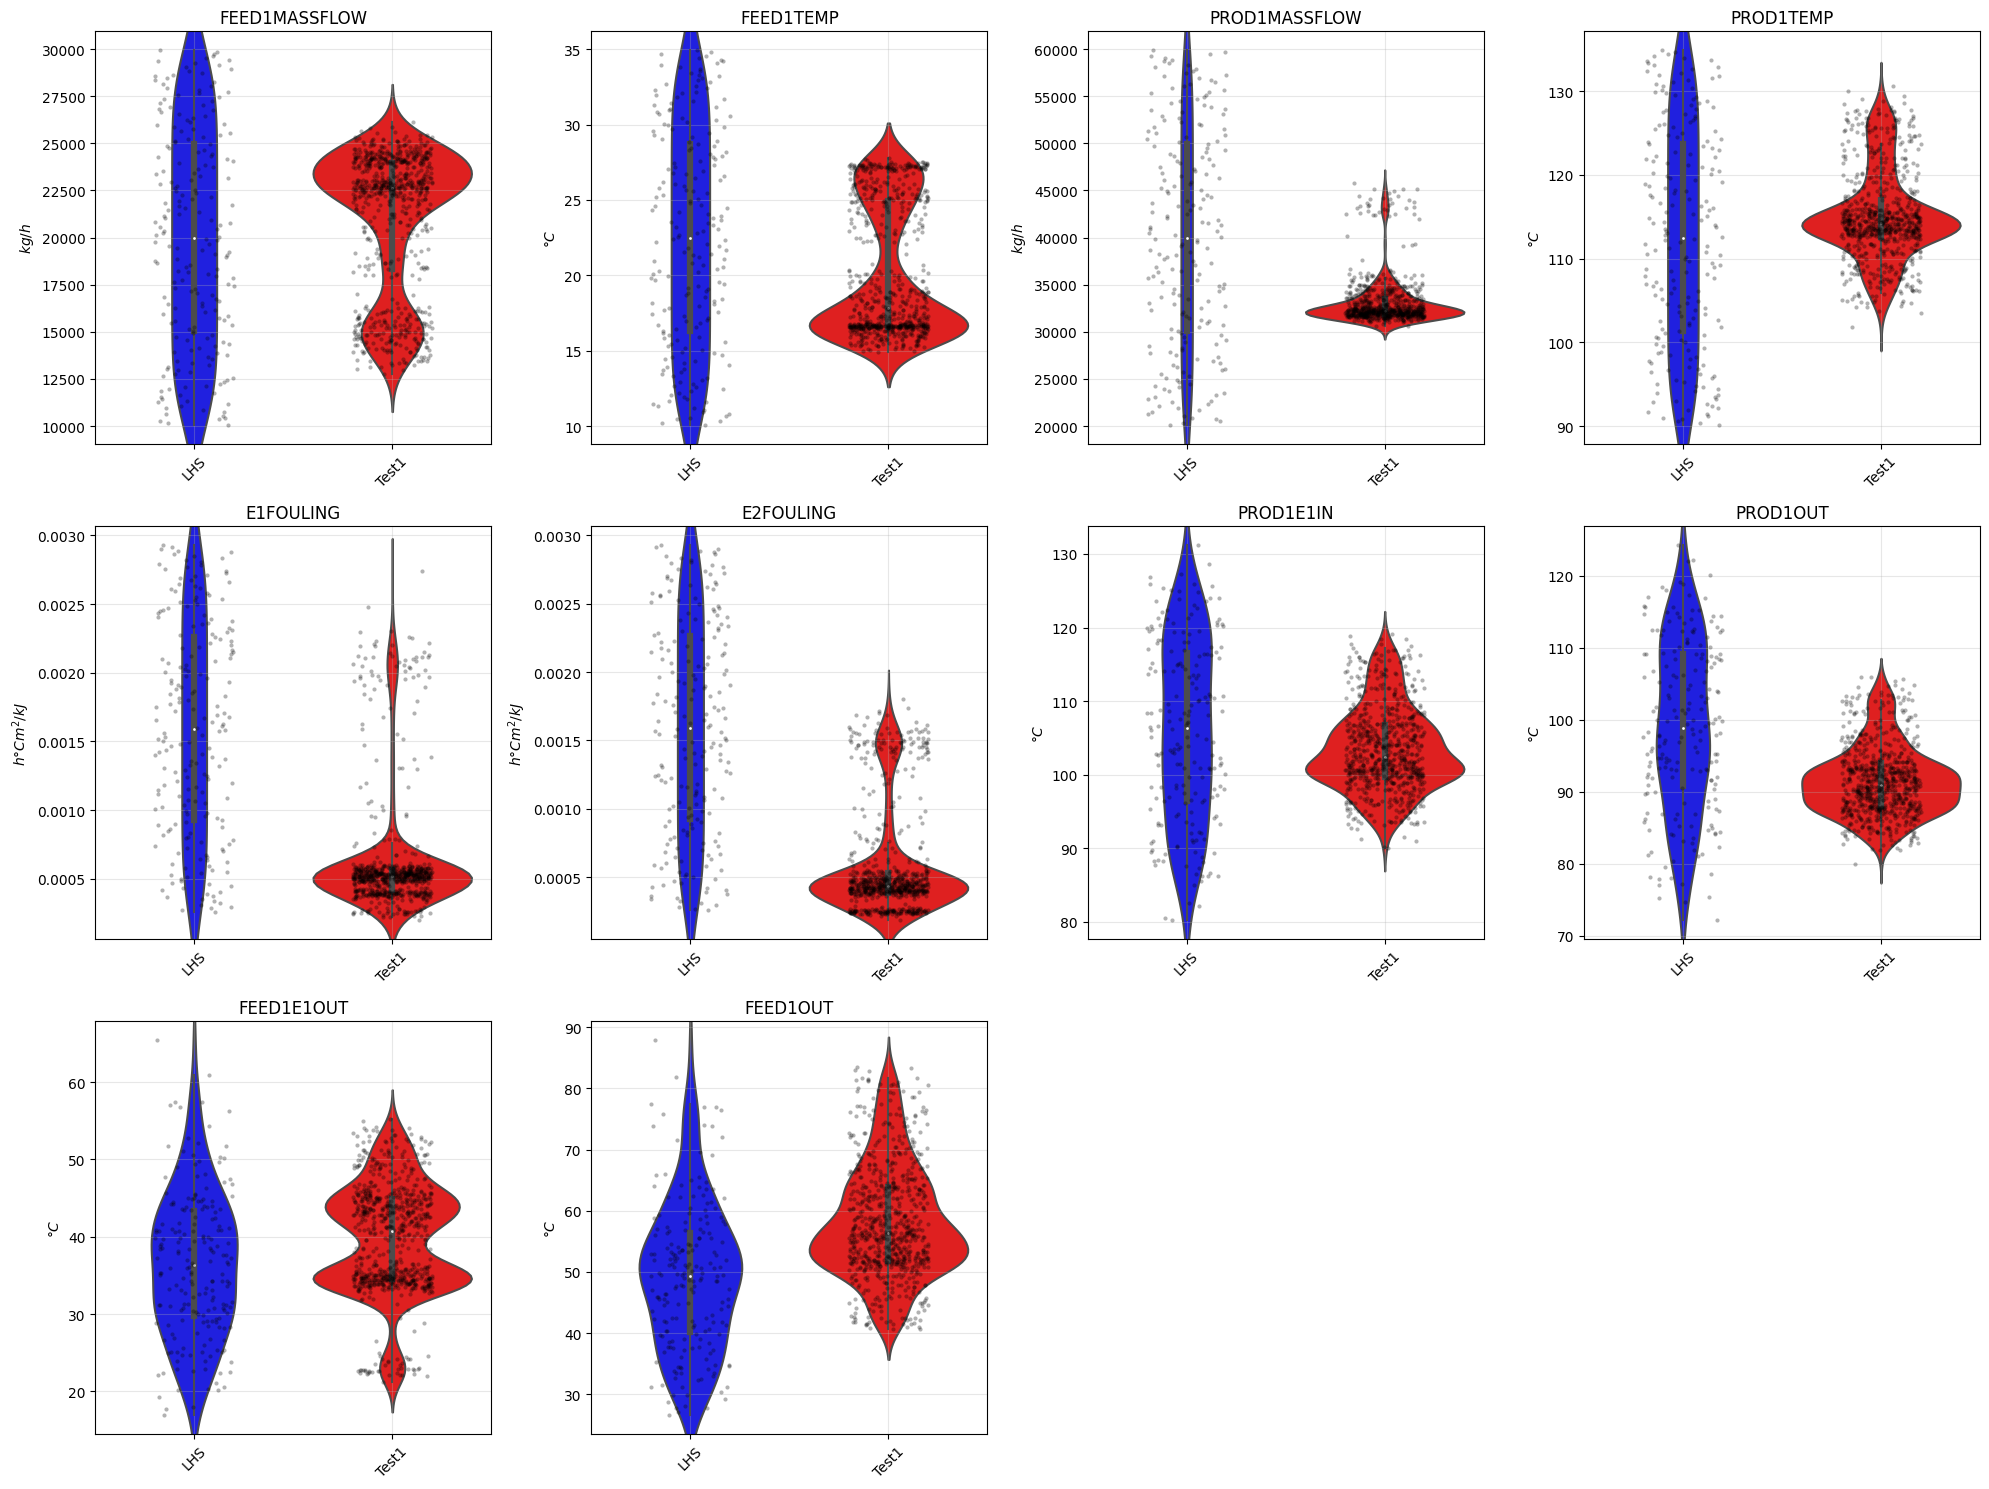

In [13]:
import seaborn as sns

def plot_parameter_distributions(lhs_data, test_data1, xy_cols):
    uoms = {'FEED1MASSFLOW':  r"$kg/h$",
 'FEED1TEMP':  r"$°C$",
 'PROD1MASSFLOW':  r"$kg/h$",
 'PROD1TEMP':  r"$°C$",
 'E1FOULING':  r"$h°Cm{^2}/kJ$",
 'E2FOULING':  r"$h°Cm{^2}/kJ$",
 'PROD1E1IN':  r"$°C$",
 'PROD1OUT':  r"$°C$",
 'FEED1E1OUT':  r"$°C$",
 'FEED1OUT':  r"$°C$"}
    # Calculate number of rows needed (4 params per row)
    n_params = len(xy_cols)
    n_rows = (n_params + 3) // 4
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    axes = axes.flatten()
    
    for idx, param in enumerate(xy_cols):
        ax = axes[idx]
        
        # Prepare data for seaborn
        combined_data = pd.DataFrame({
            'Parameter': pd.concat([
                lhs_data[param], 
                test_data1[param], 
                #test_data2[param]
            ]),
            'Dataset': ['LHS']*len(lhs_data) + 
                      ['Test1']*len(test_data1) 
                      #['Test2']*len(test_data2)
        })
        
        # Create violin plot
        sns.violinplot(data=combined_data, x='Dataset', y='Parameter', 
                      ax=ax, inner='box', palette=['blue', 'red', 'green'])
        
        # Add individual points
        sns.stripplot(data=combined_data, x='Dataset', y='Parameter', 
                     ax=ax, color='black', alpha=0.3, size=3, jitter=0.2)
        
        # Customize plot
        ax.set_title(param)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)
        ax.set_ylabel(uoms[param])
        ax.set_xlabel('')
    
    # Remove empty subplots
    for idx in range(len(xy_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    return fig, axes

# Usage
fig, axes = plot_parameter_distributions(lhs_data, test_data1, xy_cols)
plt.show()


In [14]:
lhs_data.describe()

,FEED1MASSFLOW,FEED1TEMP,PROD1MASSFLOW,PROD1TEMP,E1FOULING,E2FOULING,PROD1E1IN,PROD1OUT,FEED1E1OUT,FEED1OUT
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,20000.000000,22.500000,40000.000000,112.500000,0.001593,0.001593,106.016771,99.121250,36.433227,49.191107
std,5787.918451,7.234898,11575.836903,13.022817,0.000777,0.000777,12.265168,11.783596,9.357735,12.090131
min,10050.000000,10.062500,20100.000000,90.112500,0.000257,0.000257,80.215895,72.175777,16.929152,26.596622
25%,15025.000000,16.281250,30050.000000,101.306250,0.000925,0.000925,96.455692,90.870796,29.744329,40.188241
50%,20000.000000,22.500000,40000.000000,112.500000,0.001593,0.001593,106.293173,98.891761,36.396700,49.388092
75%,24975.000000,28.718750,49950.000000,123.693750,0.002261,0.002261,116.515558,109.138092,43.290895,56.389701
max,29950.000000,34.937500,59900.000000,134.887500,0.002929,0.002929,131.207418,124.277713,65.440839,87.914346


In [15]:
test_data1.describe()

,FEED1MASSFLOW,FEED1TEMP,PROD1MASSFLOW,PROD1TEMP,E1FOULING,E2FOULING,timestamp,PROD1E1IN,PROD1OUT,FEED1E1OUT,FEED1OUT
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730,730.000000,730.000000,730.000000,730.000000
mean,21025.013026,20.100065,33176.319399,115.065278,0.000626,0.000579,2024-04-24 01:05:32.264000,103.431791,91.510448,39.739643,58.155172
min,12771.858927,14.923454,30627.829769,101.854711,0.000199,0.000186,2023-04-25 13:05:32.264000,89.959763,79.906800,21.155993,40.628692
25%,18348.286178,16.597853,31848.997896,112.532671,0.000420,0.000388,2023-10-24 19:05:32.264000,99.695404,87.977660,34.489895,51.795046
50%,22642.184853,17.832704,32245.773157,114.223131,0.000517,0.000437,2024-04-24 01:05:32.264000,102.457628,90.906014,40.766461,56.317226
75%,23984.197619,24.955993,33428.707606,116.978514,0.000562,0.000533,2024-10-23 07:05:32.264000,106.790636,93.949174,44.887000,63.855207
max,26123.949169,27.783056,45784.423560,130.545604,0.002740,0.001806,2025-04-23 13:05:32.264000,119.118047,105.942223,55.178461,83.479979
std,3748.472535,4.335116,2628.502232,5.389702,0.000444,0.000391,NaN,5.727582,4.849216,7.151778,9.209740


# Fix Fouling

In [16]:
samples_nofit = samples.copy()
samples_nofit['E1FOULING'] = 0.00031
samples_nofit['E2FOULING'] = 0.00031

In [17]:
# init driver
simd = SM.simulation_driver(hy_filename, cols_mapping, x_cols, y_cols)
simd.load_model()

 # Connecting to the Aspen Hysys App ... 
 
HySys File: ----------   SampleModel_V2.hsc
HySys Fluid Package: ---   NRTL - Ideal
 
Model loaded sucessfuly!


In [18]:
samplingresult_nofit = []

for keys, items in tqdm.tqdm(samples_nofit.iterrows()):
    #print(keys)
    datainput = dict(items)
    tempresdict = copy.deepcopy(datainput)
    
    # run sim
    simres = simd.predict(datainput)
    # form result
    for k, r in zip(cols_mapping['OutputParams'].keys(), simres):
        tempresdict[k] = r
    # add to list
    samplingresult_nofit.append(tempresdict)

730it [00:37, 19.22it/s]


In [19]:
resdf_nofit = pd.DataFrame(samplingresult_nofit)

In [ ]:
resdf_nofit.to_excel('./Sim_result/Heat_exchanger_process_data_result_V5-short.xlsx')

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, mean_absolute_percentage_error

In [22]:
ori_f = testdf[['PROD1E1IN','PROD1OUT', 'FEED1E1OUT', 'FEED1OUT']].values
nofit_f = resdf_nofit[['PROD1E1IN','PROD1OUT', 'FEED1E1OUT', 'FEED1OUT']].values
calc_mse = []
for oriitm, notfititm in zip(ori_f, nofit_f):
    err = mean_squared_error(oriitm,notfititm)
    calc_mse.append(err)


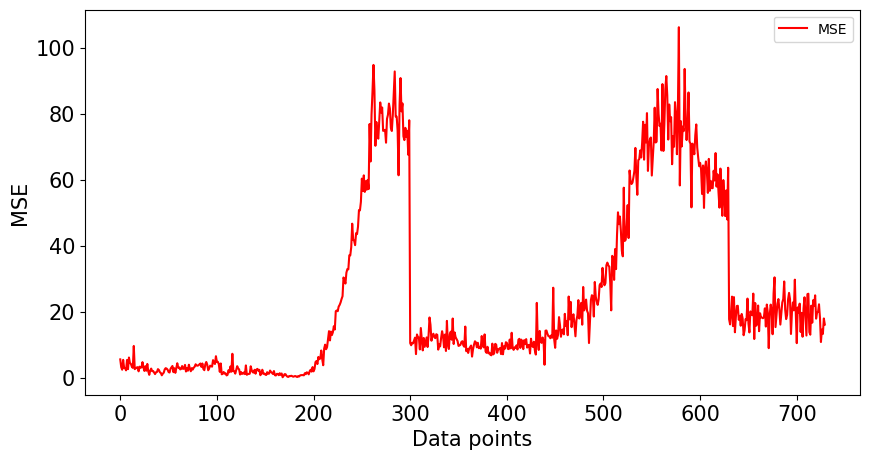

In [23]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(calc_mse, label='MSE', color='r', linestyle='solid')

#ax1.axvline(x = 64, color = 'b', linestyle='dashed')

ax1.set_xlabel('Data points', size=15)
ax1.set_ylabel('MSE', size=15)

plt.legend()
plt.show()

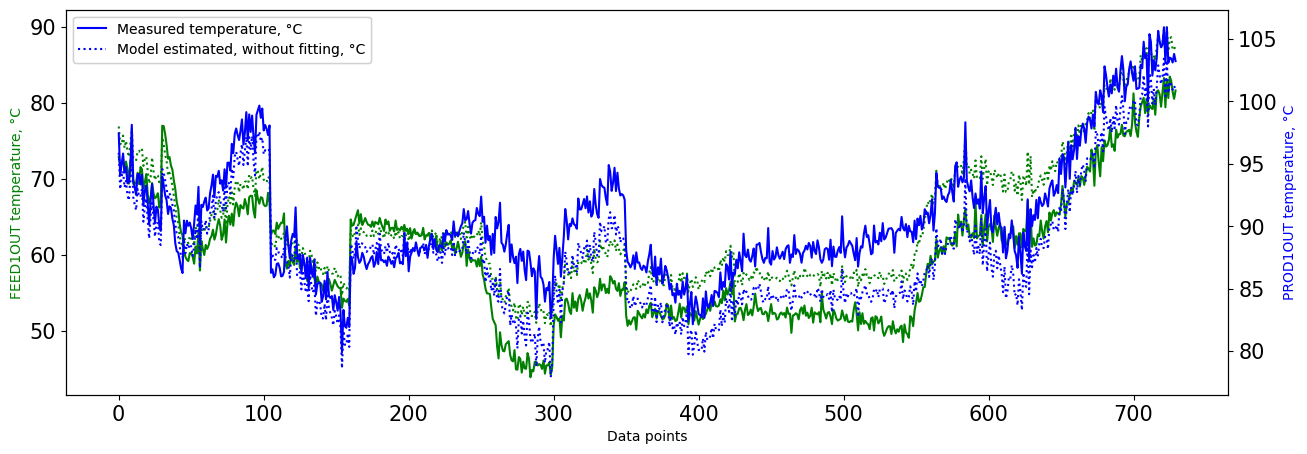

In [25]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax2 = ax1.twinx()
ax1.plot(testdf['FEED1OUT'], label='Measured temperature, °C', color='g', linestyle='solid')
ax1.plot(resdf_nofit['FEED1OUT'], label='Model estimated, without fitting, °C', color='g', linestyle='dotted')

ax2.plot(testdf['PROD1OUT'], label='Measured temperature, °C', color='b', linestyle='solid')
ax2.plot(resdf_nofit['PROD1OUT'], label='Model estimated, without fitting, °C', color='b', linestyle='dotted')

ax2.legend(loc=0)
ax1.legend(loc=2)
ax1.set_xlabel('Data points')
ax1.set_ylabel('FEED1OUT temperature, °C', color='g')
ax2.set_ylabel('PROD1OUT temperature, °C', color='b')
plt.legend()
plt.show()